In [17]:
# Instalando a blibioteca
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.3 MB/s eta 0:00:00


In [18]:
# Importando as Blibiotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [19]:
url ='https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20Equador.csv'
serie_equ = pd.read_csv(url)
serie_equ.drop(['Unnamed: 0','Confirmed','Recovered','Ano'],axis=1,
               inplace=True)
serie_equ.head()

,Date,Deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [20]:
serie_equ.columns = ['ds','y']
serie_equ.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [21]:
# Separando o dataset em treino e teste
treino = serie_equ[0:679]
teste = serie_equ[679:710]

In [92]:
modelo = NeuralProphet(seasonality_mode='additive', num_hidden_layers=10, 
                       d_hidden=10, learning_rate=0.2, batch_size=30, epochs=50,
                       daily_seasonality=3,n_forecasts=5,yearly_seasonality=2, 
                       weekly_seasonality=1
                       )

In [93]:
metrics = modelo.fit(treino, freq='D') 

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.


Training: 0it [00:00, ?it/s]

In [94]:
future = modelo.make_future_dataframe(treino, periods=len(teste))
forecast = modelo.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 23it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [95]:
print('MAPE:',mean_absolute_percentage_error(teste.y,forecast.yhat1))
print('MAE:',mean_absolute_error(teste.y,forecast.yhat1))
print('RMSE:',np.sqrt(mean_squared_error(teste.y,forecast.yhat1)))

MAPE: 0.0048754360060557535
MAE: 163.63936491935485
RMSE: 183.89537545819763


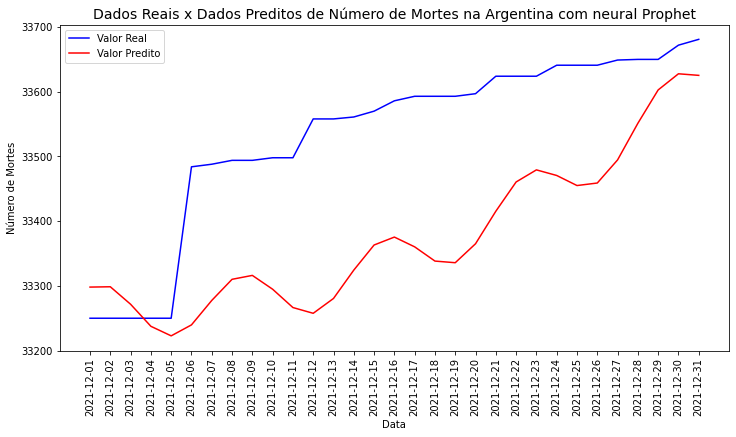

In [96]:
plt.figure(figsize=(12,6))
plt.title('Dados Reais x Dados Preditos de Número de Mortes na Argentina com neural Prophet',
          fontsize=14)
plt.plot(teste.ds,teste.y,color='blue',label='Valor Real')
plt.plot(teste.ds,forecast.yhat1,color='red',label='Valor Predito')
plt.xticks(rotation=90)
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.legend();